# Pandas

### Groupby method

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({"key1":list("aabba"), "key2":["one","two","one","two","one"],
                 "data1":np.random.randn(5), "data2":np.random.randn(5)})
df#display(df)

,key1,key2,data1,data2
0,a,one,0.227619,0.008495
1,a,two,-1.190645,-0.150052
2,b,one,-1.651927,-0.027889
3,b,two,0.341458,-0.329364
4,a,one,0.196980,-0.991364


In [3]:
display(df[df["key1"]=='a'][['data1','data2']])#,mean(0)
print(df[df["key1"]=="a"][["data1"	,"data2"]].mean(0))

,data1,data2
0,0.227619,0.008495
1,-1.190645,-0.150052
4,0.196980,-0.991364


data1   -0.255349
data2   -0.377640
dtype: float64


그룹바이 함수

In [4]:
display(df[['data1','data2']].groupby(df['key1']).mean(0)) #groupby 는 출처를 작성해야함
display(df[['data1','data2']].groupby(df['key1']).sum(0))
display(df[['data1','data2']].groupby(df['key1']).max(0))

,data1,data2
key1,,
a,-0.255349,-0.377640
b,-0.655235,-0.178626


,data1,data2
key1,,
a,-0.766046,-1.132921
b,-1.310470,-0.357253


,data1,data2
key1,,
a,0.227619,0.008495
b,0.341458,-0.027889


In [5]:
#data 1과 data 2의 평균 key2에 의하여
df[['data1','data2']].groupby(df['key2']).mean()

,data1,data2
key2,,
one,-0.409110,-0.336919
two,-0.424593,-0.239708


In [6]:
df_grop_mean = df['data1'].groupby([df['key1'],df['key2']]).mean(0)
print(df_grop_mean) # stack 형식으로 있음

key1  key2
a     one     0.212299
      two    -1.190645
b     one    -1.651927
      two     0.341458
Name: data1, dtype: float64


In [7]:
print(df_grop_mean.info()) # 두개의 컬럼에 의헤 그룹바이가 되어 계층 인덱스가 나옴
# 판다스의 시리즈
#멀티 인덱스
print(df_grop_mean.values)

<class 'pandas.core.series.Series'>
MultiIndex: 4 entries, ('a', 'one') to ('b', 'two')
Series name: data1
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 178.0+ bytes
None
[ 0.21229944 -1.19064456 -1.65192747  0.34145782]


In [8]:
# df_grop_mean == 계층 인덱스를 가지는 스택형태의 시리즈임.
#unstack를 통해 두번째 인덱스를 컬럼으로 보낼수 있음.
df_grop_mean.unstack()

key2,one,two
key1,,
a,0.212299,-1.190645
b,-1.651927,0.341458


In [9]:
# 데이타의 갯수세기
print(df['key1'].value_counts(),'\n')
print(df['key2'].value_counts(),'\n')

# 데이타의 갯수세기 groupby
print(df.groupby('key1').size(),'\n')
print(df.groupby('key2').size(),'\n')
print(df.groupby(['key1','key2']).size(),'\n')

a    3
b    2
Name: key1, dtype: int64 

one    3
two    2
Name: key2, dtype: int64 

key1
a    3
b    2
dtype: int64 

key2
one    3
two    2
dtype: int64 

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64 



## tips 엑셀 데이타

In [10]:
tips = pd.read_csv('/content/tips.csv')
display(tips.head())
#print(tips.info())

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [11]:
# tips 안에 팁의 비율 컬럼 'tip_pct' 추가
tips['tip_pct'] = tips['tip'] / tips['total_bill']
display(tips)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [12]:
tips.sort_values(by='tip_pct', ascending=False).head(5)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [13]:
# 입력은 데이터 프레임 주어진 컬럼으로 내림차순 정렬 => 상위 5개를 추출
def top(df, column='tip_pct'):
  return df.sort_values(by=column, ascending=False)[:5]

top(tips, column='tip_pct')

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [14]:
tips.groupby('smoker')['tip_pct'].mean()
# tips['tip_pct'].groupby(tips['smoker']).mean() 동일함.

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

In [15]:
# A 요일(day)별 팁 비율 평균
print(tips.groupby('day').mean()['tip_pct'],'\n\n\n')

# B 시간(time)별 팁비율 평균
print(tips.groupby('time').mean()['tip_pct'],'\n\n\n')

# C 요일, 시간(day, time)계층적 팁비율 평균 => series
print(tips.groupby(['day','time']).mean(0)['tip_pct'],'\n\n\n')

# C의 결과를 테이블 형태로 출력
display(tips.groupby(['day','time']).mean(0)['tip_pct'].unstack())

day
Fri     0.169913
Sat     0.153152
Sun     0.166897
Thur    0.161276
Name: tip_pct, dtype: float64 



time
Dinner    0.159518
Lunch     0.164128
Name: tip_pct, dtype: float64 



day   time  
Fri   Dinner    0.158916
      Lunch     0.188765
Sat   Dinner    0.153152
Sun   Dinner    0.166897
Thur  Dinner    0.159744
      Lunch     0.161301
Name: tip_pct, dtype: float64 





<ipython-input-15-3c181a3b6ad7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(tips.groupby('day').mean()['tip_pct'],'\n\n\n')
<ipython-input-15-3c181a3b6ad7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(tips.groupby('time').mean()['tip_pct'],'\n\n\n')
<ipython-input-15-3c181a3b6ad7>:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  print(tips.groupby(['day','time']).mean(0)['tip_pct'],'\n\n\n')
<ipython-input-15-3c181a3b6ad7>

time,Dinner,Lunch
day,,
Fri,0.158916,0.188765
Sat,0.153152,NaN
Sun,0.166897,NaN
Thur,0.159744,0.161301


In [16]:
tips_min = tips.groupby(['time','day']).mean(0)['tip_pct']
tips_min.unstack(fill_value =0) # Nan 값을 채워줌

<ipython-input-16-3af943b01372>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  tips_min = tips.groupby(['time','day']).mean(0)['tip_pct']


day,Fri,Sat,Sun,Thur
time,,,,
Dinner,0.158916,0.153152,0.166897,0.159744
Lunch,0.188765,0.000000,0.000000,0.161301


In [17]:
#smoker와 day로 그룹화하여 총 고객수 확인(size열을 확인)
tips.groupby(['smoker','day']).sum()['size'].unstack()

<ipython-input-17-2fa89d4e5b88>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['smoker','day']).sum()['size'].unstack()


day,Fri,Sat,Sun,Thur
smoker,,,,
No,9,115,167,112
Yes,31,104,49,40


In [18]:
#smoker와 day로 그룹화하여 팁 평균 -> 테이블로
tips.groupby(['smoker','day']).mean()['tip_pct'].unstack()

<ipython-input-18-36f432dc094c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby(['smoker','day']).mean()['tip_pct'].unstack()


day,Fri,Sat,Sun,Thur
smoker,,,,
No,0.151650,0.158048,0.160113,0.160298
Yes,0.174783,0.147906,0.187250,0.163863


In [19]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [20]:
tips.groupby('smoker').apply(top, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker                                                            
No     212       48.33   9.00     No   Sat  Dinner     4  0.186220
       59        48.27   6.73     No   Sat  Dinner     4  0.139424
       156       48.17   5.00     No   Sun  Dinner     6  0.103799
       142       41.19   5.00     No  Thur   Lunch     5  0.121389
       23        39.42   7.58     No   Sat  Dinner     4  0.192288
Yes    170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
       197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
       184       40.55   3.00    Yes   Sun  Dinner     2  0.073983

### 피벗테이블

데이타를 하나 이상의 키로 수집하여,행과 열에 지정 및 나열을 하는것

In [21]:
display(tips.pivot_table(index = ['time','smoker'])) # 인덱스 지정, 모든 열에 적용하여 평균을 구함
display(tips.groupby(['time','smoker']).mean())

<ipython-input-21-907c673dd587>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  display(tips.pivot_table(index = ['time','smoker'])) # 인덱스 지정, 모든 열에 적용하여 평균을 구함


size       tip   tip_pct  total_bill
time   smoker                                          
Dinner No      2.735849  3.126887  0.158653   20.095660
       Yes     2.471429  3.066000  0.160828   21.859429
Lunch  No      2.511111  2.673778  0.160920   17.050889
       Yes     2.217391  2.834348  0.170404   17.399130

<ipython-input-21-907c673dd587>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  display(tips.groupby(['time','smoker']).mean())


total_bill       tip      size   tip_pct
time   smoker                                          
Dinner No       20.095660  3.126887  2.735849  0.158653
       Yes      21.859429  3.066000  2.471429  0.160828
Lunch  No       17.050889  2.673778  2.511111  0.160920
       Yes      17.399130  2.834348  2.217391  0.170404

In [22]:
display(tips.pivot_table(index=['day','time'],columns='smoker'))
print('\n')
display(tips.pivot_table(['size','tip_pct'],index=['day','time'],columns='smoker')) # 테이블에 값이 없을시 NAn 처리
print('\n')
display(tips.pivot_table(['size','tip_pct'],index=['day','time'],columns='smoker',
                         fill_value=0))

size                 tip             tip_pct            \
smoker             No       Yes        No       Yes        No       Yes   
day  time                                                                 
Fri  Dinner  2.000000  2.222222  2.750000  3.003333  0.139622  0.165347   
     Lunch   3.000000  1.833333  3.000000  2.280000  0.187735  0.188937   
Sat  Dinner  2.555556  2.476190  3.102889  2.875476  0.158048  0.147906   
Sun  Dinner  2.929825  2.578947  3.167895  3.516842  0.160113  0.187250   
Thur Dinner  2.000000       NaN  3.000000       NaN  0.159744       NaN   
     Lunch   2.500000  2.352941  2.666364  3.030000  0.160311  0.163863   

            total_bill             
smoker              No        Yes  
day  time                          
Fri  Dinner  19.233333  19.806667  
     Lunch   15.980000  12.323333  
Sat  Dinner  19.661778  21.276667  
Sun  Dinner  20.506667  24.120000  
Thur Dinner  18.780000        NaN  
     Lunch   17.075227  19.190588

size             tip_pct          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.000000  2.222222  0.139622  0.165347
     Lunch   3.000000  1.833333  0.187735  0.188937
Sat  Dinner  2.555556  2.476190  0.158048  0.147906
Sun  Dinner  2.929825  2.578947  0.160113  0.187250
Thur Dinner  2.000000       NaN  0.159744       NaN
     Lunch   2.500000  2.352941  0.160311  0.163863

size             tip_pct          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.000000  2.222222  0.139622  0.165347
     Lunch   3.000000  1.833333  0.187735  0.188937
Sat  Dinner  2.555556  2.476190  0.158048  0.147906
Sun  Dinner  2.929825  2.578947  0.160113  0.187250
Thur Dinner  2.000000  0.000000  0.159744  0.000000
     Lunch   2.500000  2.352941  0.160311  0.163863

In [23]:
display(tips.pivot_table(['size','tip_pct'],index=['day','time'],columns='smoker',aggfunc='sum', #aggfunc 하여 sum avg 등등을 선택이 가능함
                         fill_value=0))

size        tip_pct          
smoker        No  Yes        No       Yes
day  time                                
Fri  Dinner    6   20  0.418867  1.488126
     Lunch     3   11  0.187735  1.133620
Sat  Dinner  115  104  7.112145  6.212055
Sun  Dinner  167   49  9.126438  3.557756
Thur Dinner    2    0  0.159744  0.000000
     Lunch   110   40  7.053669  2.785676

# MatPlotib (매틀랍)


### 시각화 라이버리

In [24]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [25]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

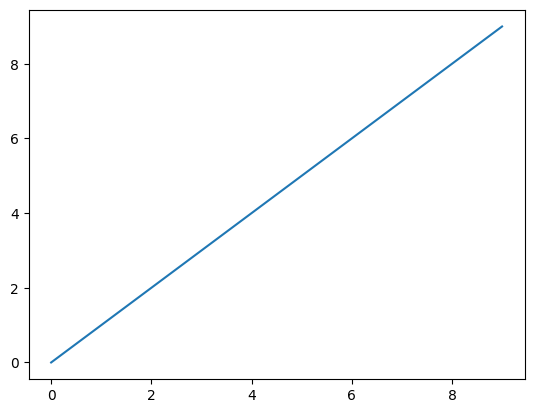

In [26]:
plt.plot(data)  # x 축 촤표 -> 데이타의 인덱스
                # y 축 좌표 -> 데이타
plt.show()
plt.close()

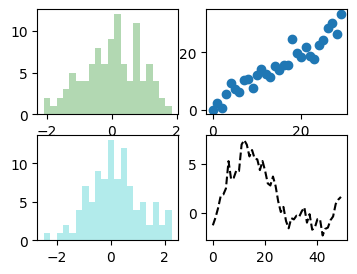

In [27]:
fig = plt.figure(figsize=(4,3))
# 1,2,3,4 분면 표시
ax1 = fig.add_subplot(2,2,1)
ax2  = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.plot(np.random.randn(50).cumsum(),"k--")
ax1.hist(np.random.randn(100), bins=20,color="g", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
ax3.hist(np.random.randn(100), bins=20,color='c', alpha=0.3)
plt.show()
plt.close('all')

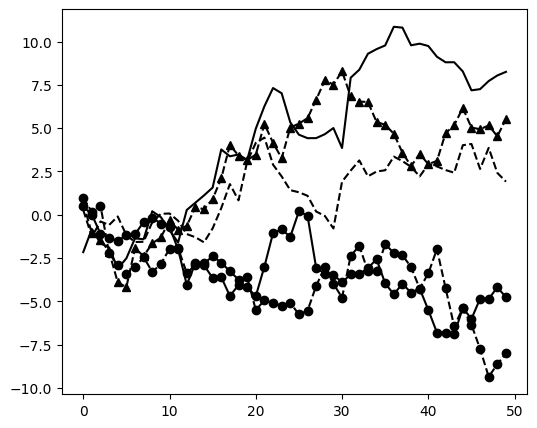

In [28]:
# 색상, 마커, 선, 스타일
fig = plt.figure(figsize=(6,5))
plt.plot(np.random.randn(50).cumsum(), 'k--') # 점선
plt.plot(np.random.randn(50).cumsum(), 'k')   # 선
plt.plot(np.random.randn(50).cumsum(), 'ko--')# 점선+동그라미
plt.plot(np.random.randn(50).cumsum(), 'ko-') # 선+ 동그라미
plt.plot(np.random.randn(50).cumsum(), 'k^--') #점선+세모

plt.show()
plt.close('all')

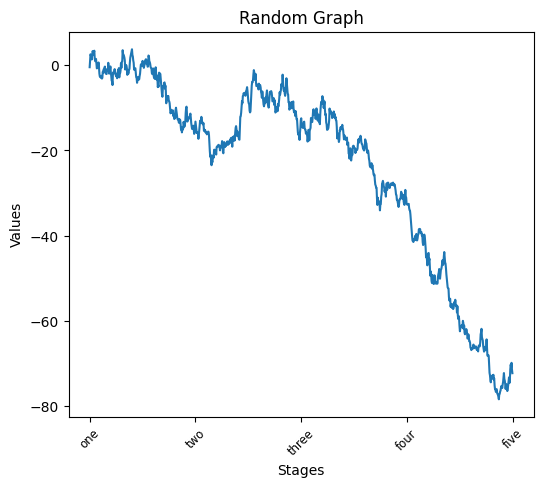

In [29]:
#눈금, 라벨, 범례
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title('Random Graph')
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'], rotation=45, fontsize='small')

ax.set_xlabel('Stages')
ax.set_ylabel('Values')
plt.show()
plt.close('all')

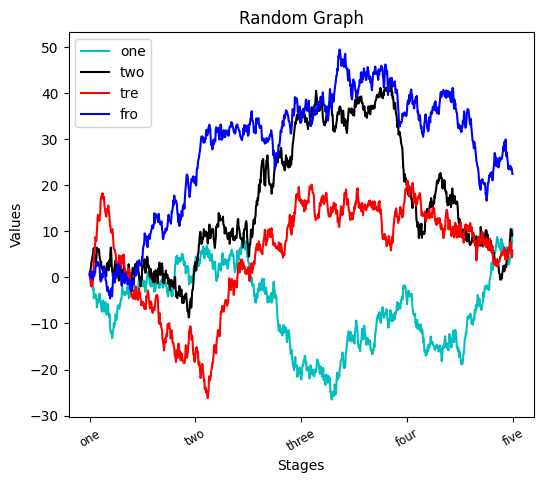

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#눈금, 라벨, 범례
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'c', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r', label='tre')
ax.plot(np.random.randn(1000).cumsum(), 'b', label='fro')
ax.set_title('Random Graph')
ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
ax.legend(loc='best')
ax.set_xlabel('Stages')
ax.set_ylabel('Values')

plt.savefig('test.png', dpi=400, bbox_inches='tight')

plt.show()
plt.close('all')

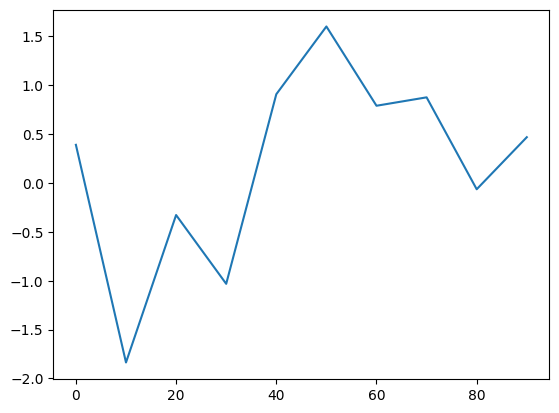

In [31]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()
plt.show()

In [32]:
df=pd.DataFrame(np.random.randn(10).cumsum(0),index=np.arange(0,100,10))

In [33]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=list('ABCD'),index=np.arange(0,100,10))
df

,A,B,C,D
0,-1.395173,0.660908,-0.418698,0.357283
10,-1.960500,1.410485,-0.305940,0.765230
20,-3.152430,2.291117,0.983155,0.895077
30,-2.394030,0.632815,-0.909620,-0.512432
40,-2.647490,0.696941,0.446665,-0.164866
50,-3.019338,-0.090212,0.999137,-0.342052
60,-2.189437,-0.100715,1.380344,0.321667
70,-2.755840,0.459238,0.633701,2.177708
80,-4.543943,1.512081,-0.017872,0.577667
90,-7.131142,1.339542,0.071563,-0.490874


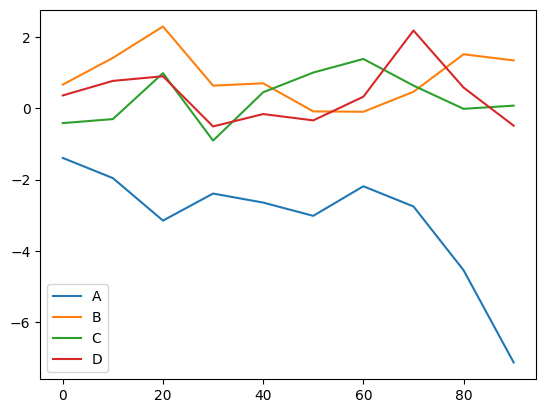

In [34]:
df.plot()
plt.show()

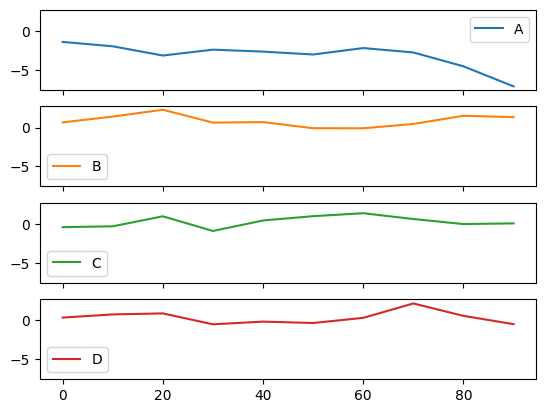

In [35]:
df.plot(subplots=True,sharey=True)
plt.show()

In [36]:
tips['tip_pct'].groupby(tips['day']).mean()

day
Fri     0.169913
Sat     0.153152
Sun     0.166897
Thur    0.161276
Name: tip_pct, dtype: float64

<Axes: xlabel='day'>

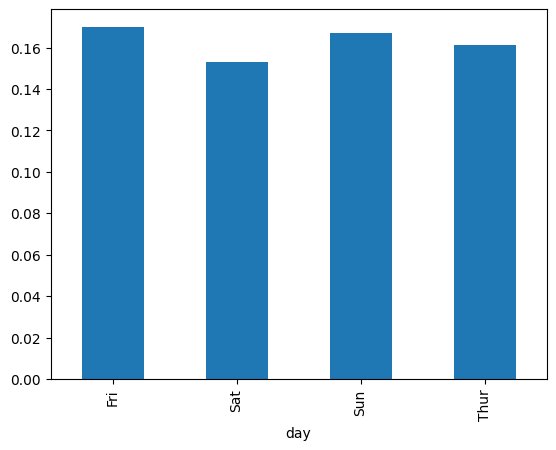

In [37]:
tips['tip_pct'].groupby(tips['day']).mean().plot.bar()

seaborn?

In [38]:
import seaborn as sns
# 통계에 자주 쓰는 seaborn

<Axes: xlabel='day', ylabel='tip_pct'>

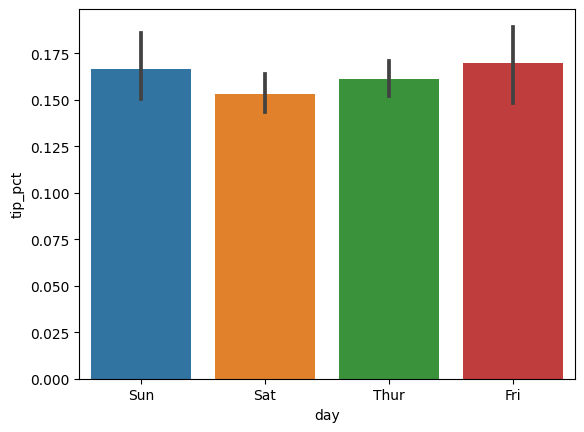

In [39]:
sns.barplot(x= "day",    y="tip_pct" , data=tips)

<Axes: xlabel='tip_pct', ylabel='day'>

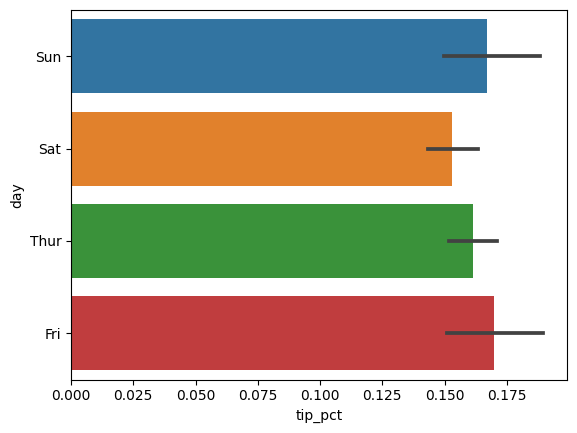

In [40]:
sns.barplot(x= "tip_pct",    y="day" , data=tips)

<Axes: xlabel='day'>

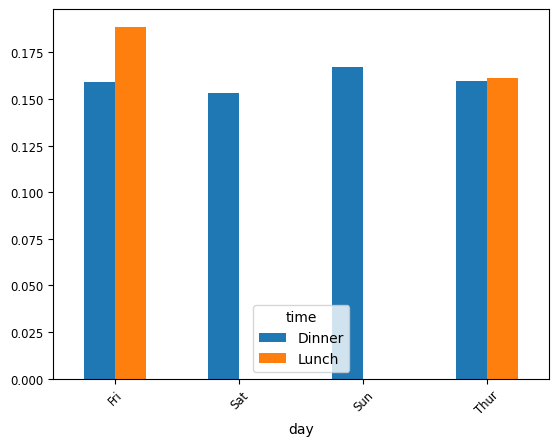

In [41]:
#tips data에서 day, time 별로 gruopby 한 후 계층 인덱스 별로 tip_pct 평균을 계산
d1 = tips.groupby(['day','time'])['tip_pct'].mean().unstack(fill_value=0)
# 이 결과를 시각화

d1.plot.bar(rot=45,fontsize='small')

<Axes: xlabel='day', ylabel='tip_pct'>

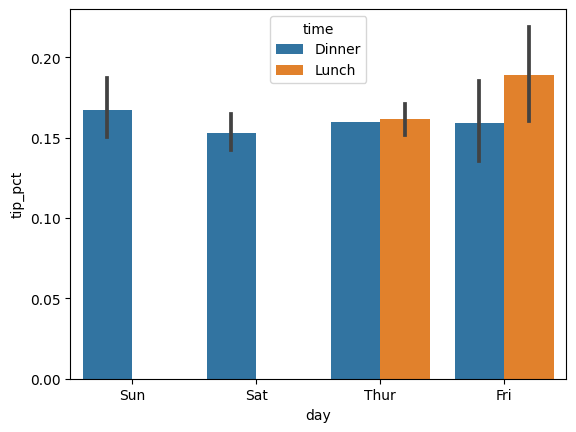

In [42]:
d1 = tips.groupby(['day','time'])['tip_pct'].mean().unstack()
sns.barplot(x="day", y="tip_pct", hue="time", data=tips)

# 전처리

### 결측치 처리
- 미싱 데이타 처리

In [43]:
concrete = pd.read_csv('/content/concrete_na.csv')
concrete.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22


In [44]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1029 non-null   float64
 1   slag          1027 non-null   float64
 2   ash           1029 non-null   float64
 3   water         1029 non-null   float64
 4   superplastic  1023 non-null   float64
 5   coarseagg     1029 non-null   float64
 6   fineagg       1028 non-null   float64
 7   age           1029 non-null   float64
 8   strength      1028 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [45]:
concrete.isnull().sum()

cement          1
slag            3
ash             1
water           1
superplastic    7
coarseagg       1
fineagg         2
age             1
strength        2
dtype: int64

In [46]:
concrete.iloc[2:4]=np.nan # 2~3행의 data는 nan으로 변경
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


In [47]:
# 모든 data가 naa인 행을 삭제
concrete.dropna(0,how='all', inplace=True)
concrete

<ipython-input-47-53acc4bd1dd6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  concrete.dropna(0,how='all', inplace=True)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90.0,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7.0,15.75
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


In [48]:
concrete[['superplastic']].describe()

,superplastic
count,1021.000000
mean,6.219099
std,5.987670
min,0.000000
25%,0.000000
50%,6.400000
75%,10.200000
max,32.200000


<Axes: >

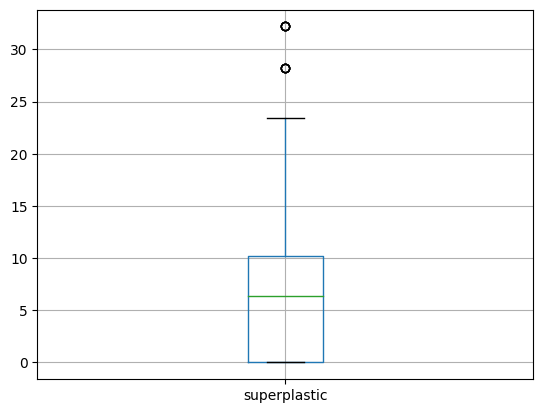

In [49]:
concrete[['superplastic']].boxplot()

In [50]:
concrete["superplastic"]=concrete["superplastic"].fillna(concrete["superplastic"].mean())
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1027 non-null   float64
 1   slag          1025 non-null   float64
 2   ash           1027 non-null   float64
 3   water         1027 non-null   float64
 4   superplastic  1027 non-null   float64
 5   coarseagg     1027 non-null   float64
 6   fineagg       1026 non-null   float64
 7   age           1027 non-null   float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 80.2 KB


In [51]:
concrete["slag"]=concrete["slag"].fillna(concrete["slag"].median())

In [52]:
concrete["fineagg"]=concrete["fineagg"].fillna(0)

In [53]:
concrete.dropna(0,how='any', inplace=True)
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1026 non-null   float64
 1   slag          1026 non-null   float64
 2   ash           1026 non-null   float64
 3   water         1026 non-null   float64
 4   superplastic  1026 non-null   float64
 5   coarseagg     1026 non-null   float64
 6   fineagg       1026 non-null   float64
 7   age           1026 non-null   float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 80.2 KB


<ipython-input-53-43e891681c01>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  concrete.dropna(0,how='any', inplace=True)


In [54]:
sub_concrete =concrete[100:110].copy()

In [59]:
duplicate_concrete=pd.concat([concrete,sub_concrete],0)
duplicate_concrete.tail(20)

<ipython-input-59-f1fff711189f>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  duplicate_concrete=pd.concat([concrete,sub_concrete],0)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7.0,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3.0,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28.0,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7.0,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3.0,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7.0,52.61


In [60]:
duplicate_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 111
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1036 non-null   float64
 1   slag          1036 non-null   float64
 2   ash           1036 non-null   float64
 3   water         1036 non-null   float64
 4   superplastic  1036 non-null   float64
 5   coarseagg     1036 non-null   float64
 6   fineagg       1036 non-null   float64
 7   age           1036 non-null   float64
 8   strength      1036 non-null   float64
dtypes: float64(9)
memory usage: 80.9 KB


In [62]:
# 중복된 데이타 확인
duplicate_concrete.duplicated().sum()

35

In [63]:
duplicate_concrete.drop_duplicates(inplace=True)
duplicate_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1001 non-null   float64
 1   slag          1001 non-null   float64
 2   ash           1001 non-null   float64
 3   water         1001 non-null   float64
 4   superplastic  1001 non-null   float64
 5   coarseagg     1001 non-null   float64
 6   fineagg       1001 non-null   float64
 7   age           1001 non-null   float64
 8   strength      1001 non-null   float64
dtypes: float64(9)
memory usage: 78.2 KB
